## Text Categorization

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings

In [3]:
raw_data = pd.read_csv("Data/TMSMM_class3_amazon_reviews.csv")
print(raw_data)

In [ ]:
# deal with eventual warnings and set seedwarnings.filterwarnings('ignore') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
np.random.seed(7)

In [ ]:
csv = "TMSMM_class3_amazon_reviews.csv"
df = pd.read_csv(csv)
df.head(10)

In [ ]:
# more about ratings
data = df.copy()
data.describe()

In [ ]:
data.info()

In [4]:
# the ratings on the Avent Bottles are quite spread on the extreme
# might be that people only write reviews if they are super excited or very frustrated with a product
# we want this to be a simple classification exercise (below)

In [ ]:
# deal with eventual missing values
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["rating"])

In [ ]:
print("After {}".format(len(dataAfter)))
dataAfter["rating"] = dataAfter["rating"].astype(int)

In [ ]:
# split into train and test subsets
split = StratifiedShuffleSplit(n_splits=5, test_size=0.25)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [ ]:
# inspect the subsets

len(strat_train)
strat_train["rating"].value_counts()/len(strat_train)
len(strat_test)
strat_test["rating"].value_counts()/len(strat_test)

In [ ]:
reviews = strat_train.copy()
reviews.head(2)
reviews.info() 

In [ ]:
data.describe()

In [ ]:
# put a 'positive label' for great reviews (4 or 5) or a 'negative label' for bad reviews (1 or 2)
# all the reviews that have a rating of 3 considered as neutral

In [ ]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

In [ ]:
# add labels to the data
strat_train["Sentiment"] = strat_train["rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["rating"].apply(sentiments)
strat_train["Sentiment"][:20]

In [ ]:
# prepare data for the model
X_train = strat_train["review"]
X_train_targetRating = strat_train["rating"]
X_test = strat_test["review"]
X_test_targetRating = strat_test["rating"]
print(len(X_train), len(X_test))

In [ ]:
# drop missing values, nan
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetRating = X_train_targetRating.fillna(' ')
X_test_targetRating = X_test_targetRating.fillna(' ')

In [ ]:
# cleaning the text
# see the number of objects and distinct words
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

In [5]:
# term frequencies (Tf) - to divide the number of occurrences for each word by total number of words
# term frequencies times inverse document frequency (Tfidf) - to downscale the weights of each word (assign less value to unimportant stop words)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

In [6]:
# try with SVM
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetRating)

In [ ]:
predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetRating)

# Text Categorization 2

Note of reference\
The SMS Spam Collection v.1 was gathered for SMS Spam research,\
it contains one set of English SMS of 5,574 messages, \
tagged acording being ham (legitimate) or spam. \
http://www.dt.fee.unicamp.br/~tiago/smsspamcollection

In [8]:
# inspect the data
message = [line.rstrip() for line in open("Data/TMSMM_class4_SMSSpamCollection.csv")]
print(len(message))

5574


In [9]:
for message_no,message in enumerate(message[:10]):
    print(message_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [11]:
# make it look better
message=pd.read_csv("Data/TMSMM_class4_SMSSpamCollection.csv",sep='\t',names=["labels","message"])
message.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
message.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
message.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [16]:
message['length']=message['message'].apply(len)

message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# basic visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

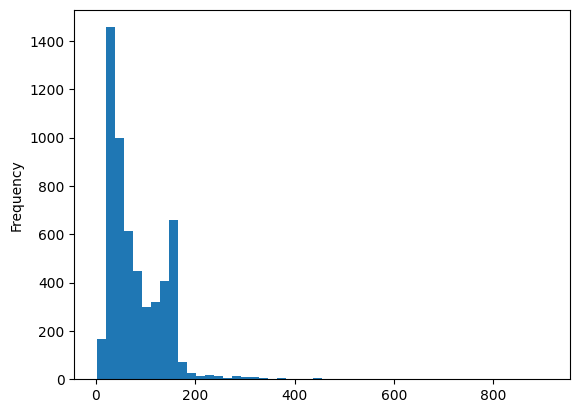

In [18]:
message['length'].plot(bins=50,kind='hist')

In [19]:
# descriptive stats
message.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
# inspect the longest message
message[message['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### text preprocessing

In [23]:
import string

mess = 'sample message!...'

nopunc = [char for char in mess if char not in string.punctuation]
nopunc = ''.join(nopunc)
print(nopunc)

sample message


### stopwords

In [26]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [27]:
nopunc.split()

['sample', 'message']

In [29]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



In [33]:
# apply this to our case

def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] 

    

In [34]:
# original data
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
# processed one
message['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [36]:
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


---
### vectorization
count how many times does a word occur in each message, term frequency\
weigh the counts, so that frequent tokens get lower weight, inverse document frequency\
normalize the vectors to unit length, to abstract from the original text length, L2 norm 

---

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(message['message'])

print(len(bow_transformer.vocabulary_))

11425


In [39]:
message4 = message['message'][3]

print(message4)

U dun say so early hor... U c already then say...


In [41]:
# vector representation
bow4 = bow_transformer.transform([message4])

print(bow4)
print(bow4.shape)

# seven unique words in message number 4
# two of them appear twice, the rest only once

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [43]:
# which one appears twice?
print(bow_transformer.get_feature_names_out()[4073])
print(bow_transformer.get_feature_names_out()[9570])

UIN
schedule


In [45]:
# the bag-of-words counts for the entire SMS corpus
messages_bow = bow_transformer.transform(message['message'])

print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of non-zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of non-zero occurences:  50548


In [46]:
sparsity = (100.0 * messages_bow.nnz/(messages_bow.shape[0] * messages_bow.shape[1]))

print('sparsity:{}'.format(round(sparsity)))

sparsity:0


### Term weighting and normalization with TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

tfidf4 = tfidf_transformer.transform(bow4)

print(tfidf4)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	0.40832589933384067
  (0, 4629)	0.26619801906087187
  (0, 5261)	0.29729957405868723
  (0, 6204)	0.29953799723697416
  (0, 6222)	0.3187216892949149
  (0, 7186)	0.4389365653379857
  (0, 9554)	0.5385626262927564


In [48]:
# sneak peak
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [49]:
# inspect the parameters
messages_tfidf = tfidf_transformer.transform(messages_bow)

print(messages_tfidf.shape)

(5572, 11425)


In [50]:
# train the model, for instance Naive Bayes
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(messages_tfidf, message['labels'])

In [51]:
print('predicted: ', spam_detect_model.predict(tfidf4)[0])

print('expected: ', message.labels[3])

predicted:  ham
expected:  ham


In [52]:
# what is the quality of our model?
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [54]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(message['labels'],all_predictions))
print(confusion_matrix(message['labels'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 115  632]]


In [55]:
# split the data into train and test parts
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(
    message['message'],message['labels'],test_size=0.2)

In [56]:
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

4457 1115 4457 1115


In [57]:
# store a pipeline for workflow
# run the model again
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [58]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1019
        spam       0.72      1.00      0.84        96

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.98      0.97      0.97      1115

